In [36]:
# Importing essential libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import missingno as msno

In [37]:
# Settings for visualization  
sns.set_style(style='white') 
sns.set(rc={
    'figure.figsize':(12,7), 
    'axes.facecolor': 'white',
    'axes.grid': True, 'grid.color': '.9',
    'axes.linewidth': 1.0,
    'grid.linestyle': u'-'},font_scale=1.5)

# Color palette for the visualiztion
custom_colors = ["#3498db", "#95a5a6","#34495e", "#2ecc71", "#e74c3c"]
sns.set_palette(custom_colors)

In [38]:
# Importing cars dataset CSV
cars_data = pd.read_csv(r"/Users/praveen/Desktop/Stats Project/cars_final_data.csv")

In [39]:
# Basic information of cars dataset
print("No. of rows in the cars_data:",cars_data.shape[0])
print("No. of columns in the cars_data:",cars_data.shape[1])
print()
print(cars_data.info())
# Top 5 observations of the dataframe
cars_data.head()

No. of rows in the cars_data: 901
No. of columns in the cars_data: 5

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901 entries, 0 to 900
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   vehicle_brand    901 non-null    object 
 1   year             901 non-null    int64  
 2   engine_capacity  901 non-null    float64
 3   miles_driven     901 non-null    int64  
 4   selling_price    901 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 35.3+ KB
None


,vehicle_brand,year,engine_capacity,miles_driven,selling_price
0,BMW,2010,3.0,82,36900.0
1,BMW,1985,2.5,280,4300.0
2,Volkswagen,2010,1.4,60,10700.0
3,Toyota,2011,2.5,75,23500.0
4,BMW,2012,3.0,82,49900.0


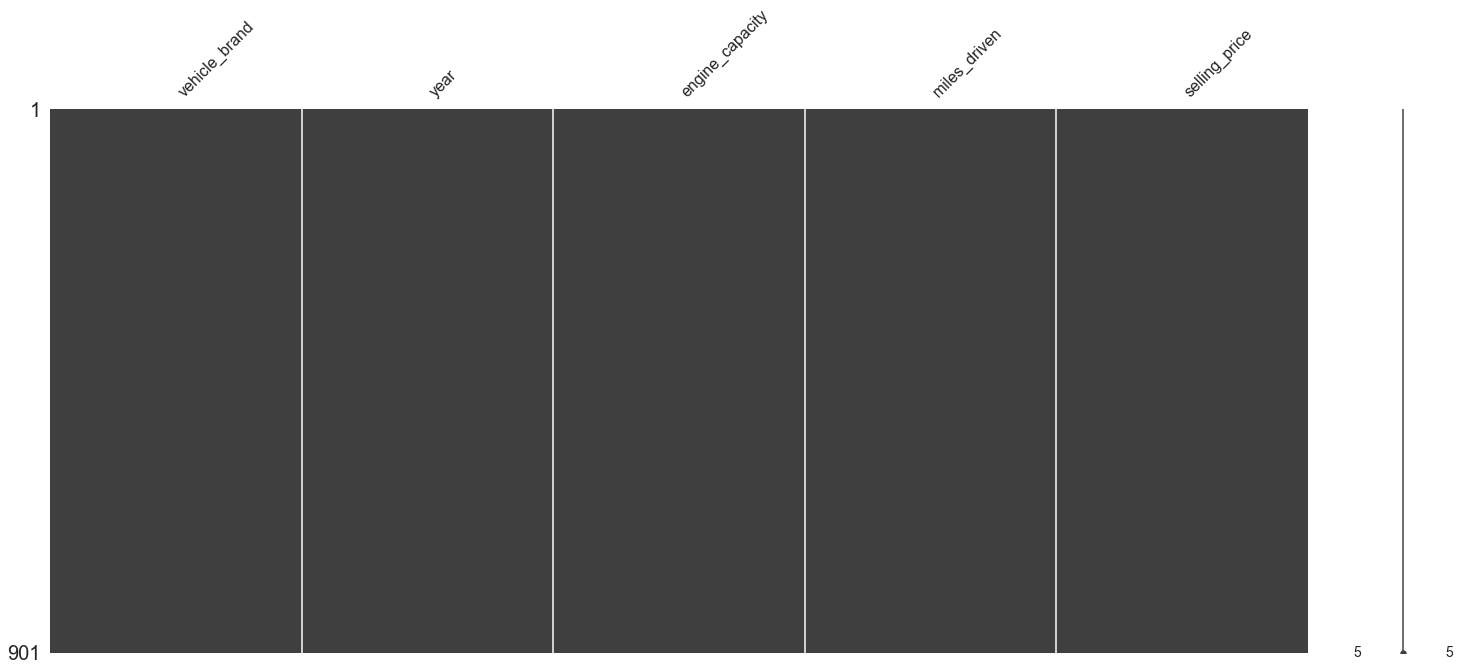

In [40]:
# Visualising if we have any missing values
msno.matrix(cars_data)
plt.show()

**Observation**: From the above info and the visualization, we can see that we do not have any missing values and the dataset is clean. We can start analysing the dataset to build a model for Multiple Linear Regression

In [41]:
# Displaying the unique brand names in the dataset
print("List of unique brand names in the dataset: ")
# Saves the unique brands list into the variable
unique_brands_list = cars_data["vehicle_brand"].unique()
print(unique_brands_list)

List of unique brand names in the dataset: 
['BMW' 'Volkswagen' 'Toyota' 'Renault' 'Mercedes-Benz' 'Audi' 'Mitsubishi']


Text(0, 0.5, 'Engine Capacity')

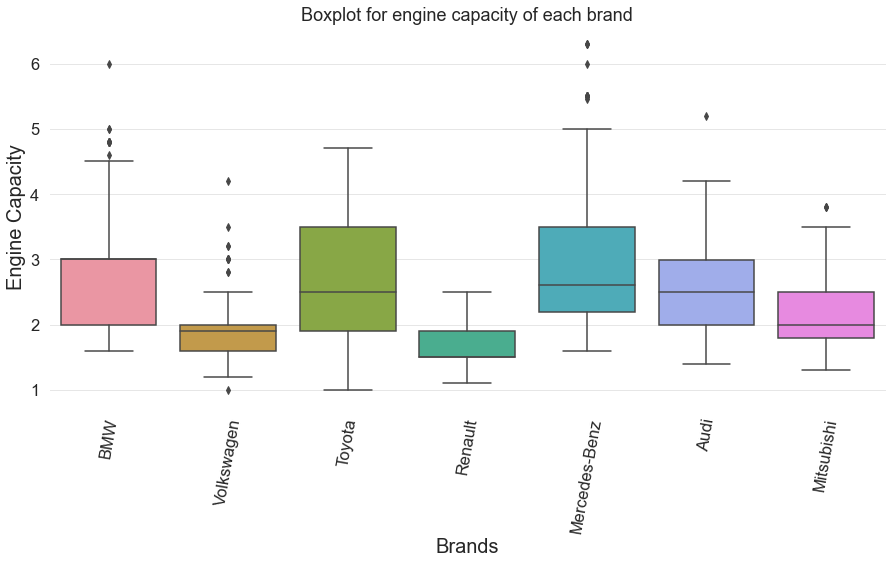

In [42]:
# Displays the box plot for all the brand's Cubic Capacities
plt.figure(figsize=(15,7)) # Sets the figure size
# Box plot is constructed using the cubic capacity for each brand, it made sure the null values are removed before the 
# box plot is built
sns.boxplot(x="vehicle_brand", y="engine_capacity", data=cars_data).set(title='Boxplot for engine capacity of each brand')
# Basic settings
plt.xticks(rotation=80)
plt.xlabel("Brands", fontsize = 20)
plt.ylabel("Engine Capacity", fontsize = 20)

Text(0, 0.5, 'Selling Price in USD')

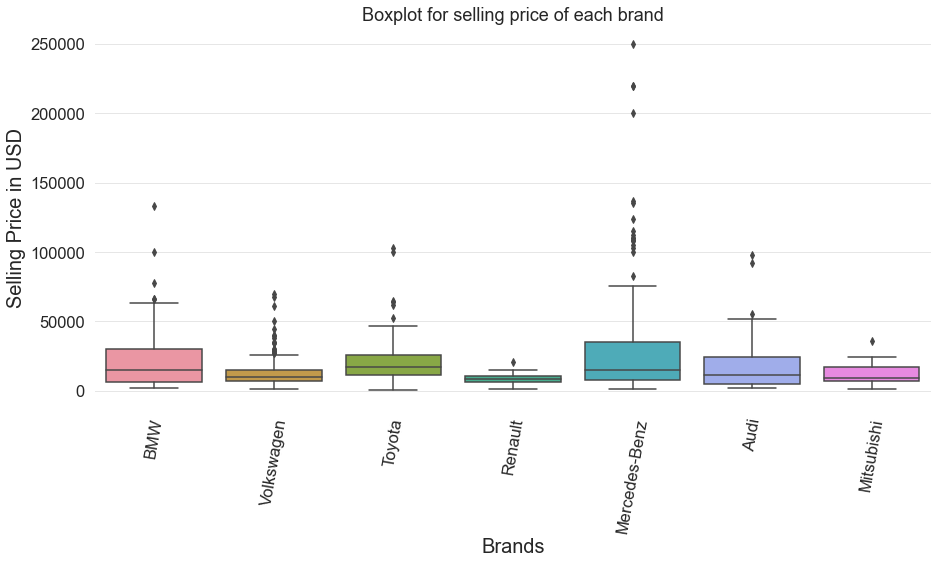

In [43]:
# Displays the box plot for all the brand's Cubic Capacities
plt.figure(figsize=(15,7)) # Sets the figure size
# Box plot is constructed using the cubic capacity for each brand, it made sure the null values are removed before the 
# box plot is built
sns.boxplot(x="vehicle_brand", y="selling_price", data=cars_data).set(title='Boxplot for selling price of each brand')
# Basic settings
plt.xticks(rotation=80)
plt.xlabel("Brands", fontsize = 20)
plt.ylabel("Selling Price in USD", fontsize = 20)

### Checking Linearity

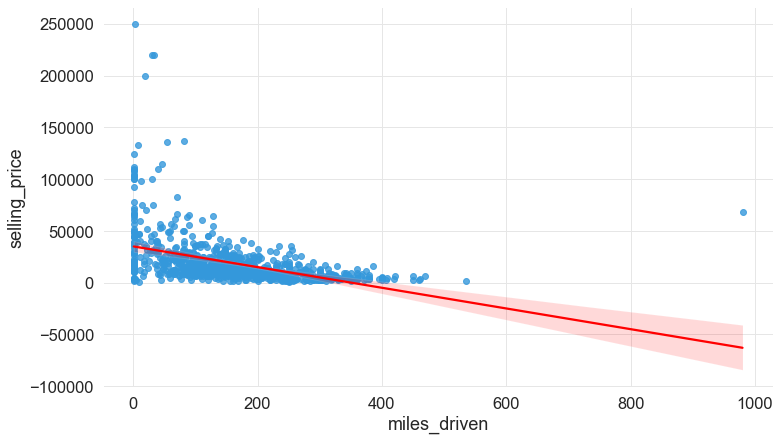

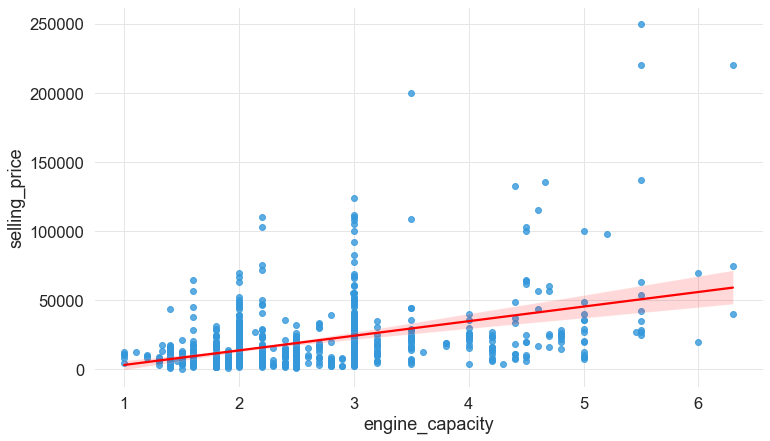

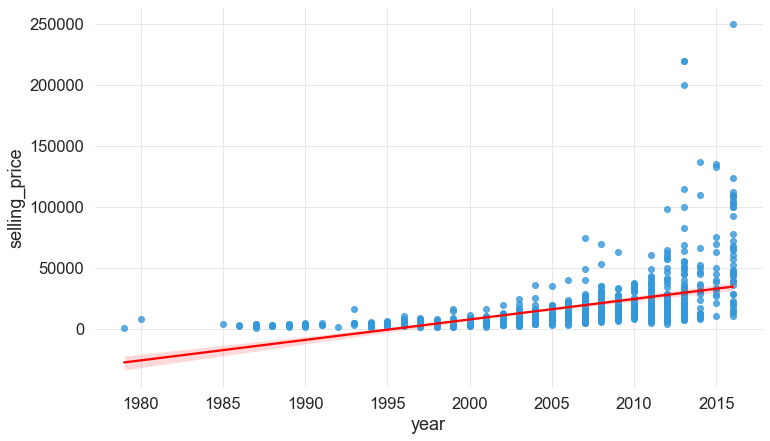

In [44]:
temp_list = ["miles_driven","engine_capacity","year"]

for i in temp_list:
    sns.regplot(x = i, y = "selling_price", data = cars_data, line_kws={"color": "red"})
    plt.show()

**Observation:** From the obove 3 graphs, we can see that we can spot some patterns but definitely not linear plots, since we have exponential scatter plots, we can use **Log Transform** on selling price column 

In [45]:
# Current dataframe:
cars_data.head()

,vehicle_brand,year,engine_capacity,miles_driven,selling_price
0,BMW,2010,3.0,82,36900.0
1,BMW,1985,2.5,280,4300.0
2,Volkswagen,2010,1.4,60,10700.0
3,Toyota,2011,2.5,75,23500.0
4,BMW,2012,3.0,82,49900.0


In [46]:
# Adding new column that contains log transformed values of selling price data which are currenlty too high
# log base 10 will scale the selling price data so that it can be better visualized and liniarity can be 
# observed 
cars_data["log_of_selling_price"] = round(np.log10(cars_data["selling_price"]),4)
cars_data.head()

,vehicle_brand,year,engine_capacity,miles_driven,selling_price,log_of_selling_price
0,BMW,2010,3.0,82,36900.0,4.5670
1,BMW,1985,2.5,280,4300.0,3.6335
2,Volkswagen,2010,1.4,60,10700.0,4.0294
3,Toyota,2011,2.5,75,23500.0,4.3711
4,BMW,2012,3.0,82,49900.0,4.6981


### Checking Linearity Again Considering Log Transform of Selling Price

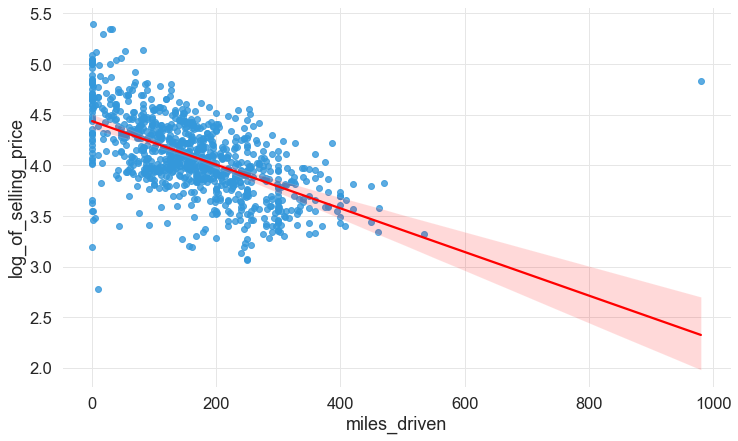

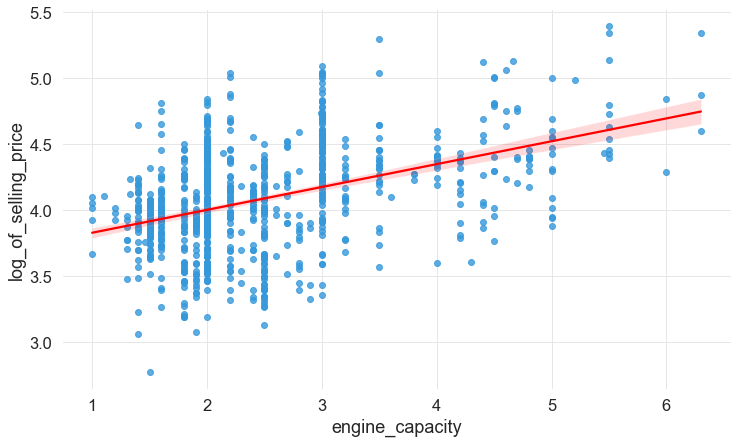

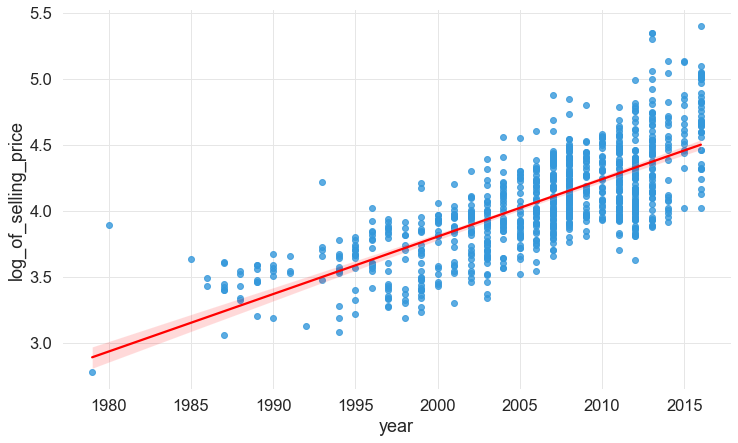

In [47]:
temp_list = ["miles_driven","engine_capacity","year"]

for i in temp_list:
    sns.regplot(x = i, y = "log_of_selling_price", data = cars_data, line_kws={"color": "red"})
    plt.show()

**Observation:** We can observe that the line fits better to the scatter plots better than the last time. We can observe a linear pattern in all the three plots above